# KAGGLE TITANIC Competition
* Developing ML model to predict how many people will survive the shipwreck.
* The first line of code below shows us where the competition data is stored.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


#    The code below loads the following datasets.
*  `train_data`: Used to train the model
*  `test_data`: Used to evaluate the predictive accuracy of our model

In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Things to note!!
* The `train_data` is clean and organized, helping us identify patterns.
* After identifying those patterns and our model we now want to use them to predict which passenger will survive on test_data
* The `test_data` is neither clean nor organized. It contains missing values for certain parameters, which might be crucial for predicting survival.
* Most importantly, we cannot eliminate rows with missing values since we need to predict for all individuals in `test_data`. Instead, statistical measures such as mean and mode must be used to handle missing values.
* Let's visualise the train data to see which parameters are of uttermost importance when it comes to survival

In [6]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


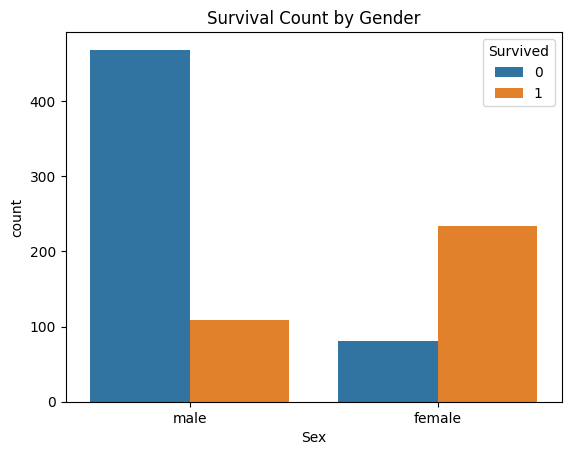

In [7]:
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

*   From above we see that most woman survived as compared to man.
*   so it means that 'Sex' parameter is very important

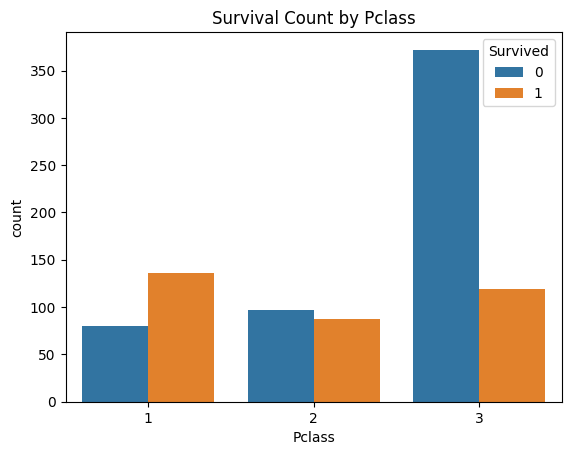

In [8]:
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('Survival Count by Pclass')
plt.show()

*   From above we see that most people from class 3 didnt survive.
*   so class might also be important
*   Then we can continue to test for some other parameters but we wont do that here as we want dive into other aspects

# Next section
* From the above we saw that most woman survived as compared to man
* we can show this again by calculating the percentage of woman that survived on the titaniv

In [9]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


* from the above we can see that gender plays an important role
* but we cant use it alone since their other parameters that can play important roles like class
* but if we can look at multiple columns at the same tie we can discover even moe patterns that can help us predict who is likely to survive on test_data
* To do this we employ machine learning to help us.

# Random Forest Model.
* we will deploy yhe model above on certain columns that we believe they ahve impact on survival
* so that it can help us predict if someone will survive given those parameters.

In [10]:
test_data
train_data
#checks if our data contains missing values
print(train_data['Age'].notnull().all())

False


In [11]:
print(test_data['Age'].notnull().all())

False


* from what I found age contains missing values both for train and test data
* so we will start by training our model without 'Age' to see the predictive accuracy
* and come back to include 'Age' to see if there can be any improvements

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch","Fare"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Assuming you've already generated X_test
if X_test['Fare'].isnull().sum() > 0:
    print("Missing values detected in 'Fare' column of X_test.")
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent'
    X_test[['Fare']] = imputer.fit_transform(X_test[['Fare']])
    
    print("Missing values in 'Fare' have been imputed.")
else:
    print("No missing values in 'Fare' column of X_test.")

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Missing values detected in 'Fare' column of X_test.
Missing values in 'Fare' have been imputed.
Your submission was successfully saved!


### Results
* The score or prediction accuracy on this model was 'Score: 0.77751'
* of which still needs some improvements, so we will go ahead and include age on the following Forest Model.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
import math
from statistics import mean, median, mode

def impute_column(data, column, method='mean'):
    # Extract values from the column
    values = data[column].tolist()
    
    # Compute the statistic based on the method
    if method == 'mean':
        # Use only non-NaN values for calculation
        dd = mean([v for v in values if not (isinstance(v, float) and math.isnan(v))])
    elif method == 'median':
        dd = median([v for v in values if not (isinstance(v, float) and math.isnan(v))])
    elif method == 'mode':
        try:
            # Mode might not be unique, so we take the first one if there are multiple modes
            dd = mode([v for v in values if not (isinstance(v, float) and math.isnan(v))])
        except StatisticsError:
            # If no mode because all values are unique or NaN, fall back to mean
            dd = mean([v for v in values if not (isinstance(v, float) and math.isnan(v))])
    else:
        raise ValueError("Method must be 'mean', 'median', or 'mode'")
    
    # Impute NaN values
    data[column] = [dd if (isinstance(v, float) and math.isnan(v)) else v for v in values]

# Example usage for train_data
impute_column(train_data, 'Age', method='mean')  # Change 'mean' to 'median' or 'mode' as needed

# Example usage for test_data
impute_column(test_data, 'Age', method='mean')   # Change 'mean' to 'median' or 'mode' as needed


y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch","Fare","Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Assuming you've already generated X_test
if X_test['Fare'].isnull().sum() > 0:
    print("Missing values detected in 'Fare' column of X_test.")
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent'
    X_test[['Fare']] = imputer.fit_transform(X_test[['Fare']])
    
    print("Missing values in 'Fare' have been imputed.")
else:
    print("No missing values in 'Fare' column of X_test.")

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Missing values detected in 'Fare' column of X_test.
Missing values in 'Fare' have been imputed.
Your submission was successfully saved!


### Results
* The score or prediction accuracy on the above model has now increased to 'Score: Score: 0.78468'
* It indeed shows that Age is a determining factor for survival even though the increase is not that much.
* But we can play around with the replacement of missing values(Mean, Mode, Median) to see if the results improve.